<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:10px 10px;"><b>Random Forest Classification - Penguins Dataset</b></p>

**About Dataset**

- The Palmer Archipelago (Antarctica) Penguins dataset contains data on three different species of penguins (Adelie, Chinstrap, and Gentoo) found in Antarctica's Palmer Archipelago.

- This dataset is quite popular for various research and educational uses, particularly for teaching and testing data analysis, statistical models, and machine learning algorithms.

- The dataset includes morphological measurements of the penguins; these measurements include the length and depth of their beaks, flipper (wing) length, and body weight. Additionally, information such as the penguin's species, island, and sex is provided for each observation.

- The Penguins dataset is a popular resource among data science and machine learning communities for both educational and research purposes. Moreover, this dataset is frequently used alongside the seaborn library.

- It is a sufficiently simple dataset to understand how classification results can change by tweaking hyperparameters.

- The data were collected and made available by Dr. Kristen Gorman and her team, members of the Antarctic Long-Term Ecological Research Network (LTER).

- **species**: Indicates the species of the penguin. Unique values: Adelie, Chinstrap, Gentoo.

- **island**: The island where the penguin was observed. Unique values: Biscoe, Dream, Torgersen.

- **culmen_length_mm**: The length of the penguin's culmen (in millimeters).

- **culmen_depth_mm**: The depth of the penguin's culmen (in millimeters).

- **flipper_length_mm**: The length of the penguin's flipper (in millimeters).

- **body_mass_g**: The body weight of the penguin (in grams).

- **sex**: The sex of the penguin.

**The goal is to create a model that can predict a penguin's species based on physical characteristics, thus aiding researchers in classifying penguins in the field without the need for an experienced biologist.**

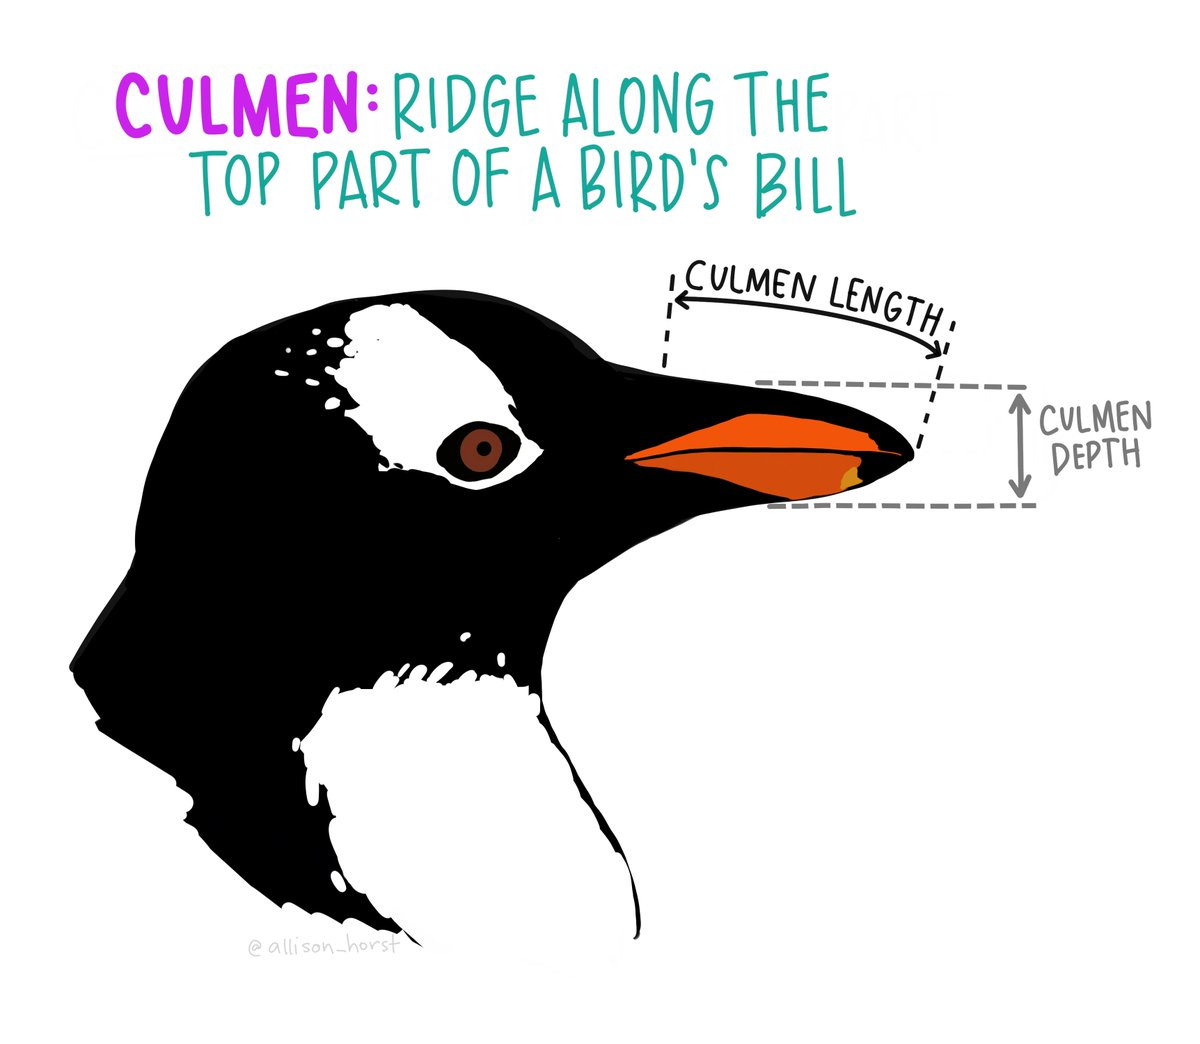

# <font color='orange'> <b>Importing Libraries</b><font color='orange'>  

In [10]:
# pip install cufflinks

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf  

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='orange'> <b>Loading The Dataset & EDA</b><font color='orange'>  

In [19]:
df0 = pd.read_csv("penguins_size.csv")
df = df0.copy()

In [21]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# <font color='orange'> <b>Understanding The Data & EDA</b><font color='orange'>  

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [27]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [29]:
df = df.dropna()

In [31]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [33]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include='number').columns

In [35]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""
    
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [37]:
unique_values(df, cat_features)

Column: species
------------------------------
Unique Values (3): ['Adelie' 'Chinstrap' 'Gentoo']

Value Counts:
species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

Column: island
------------------------------
Unique Values (3): ['Torgersen' 'Biscoe' 'Dream']

Value Counts:
island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64

Column: sex
------------------------------
Unique Values (3): ['MALE' 'FEMALE' '.']

Value Counts:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64



In [39]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [41]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [43]:
df.loc[336, "sex"] = "MALE"

In [45]:
df.loc[336, "sex"]

'MALE'

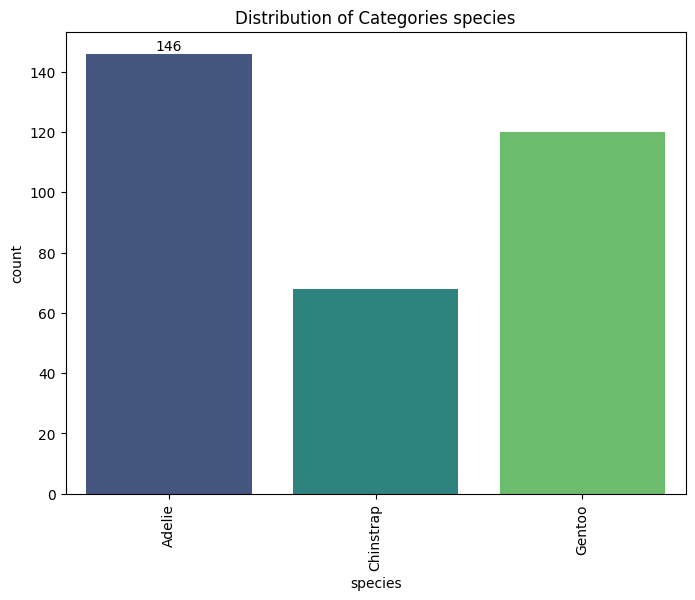

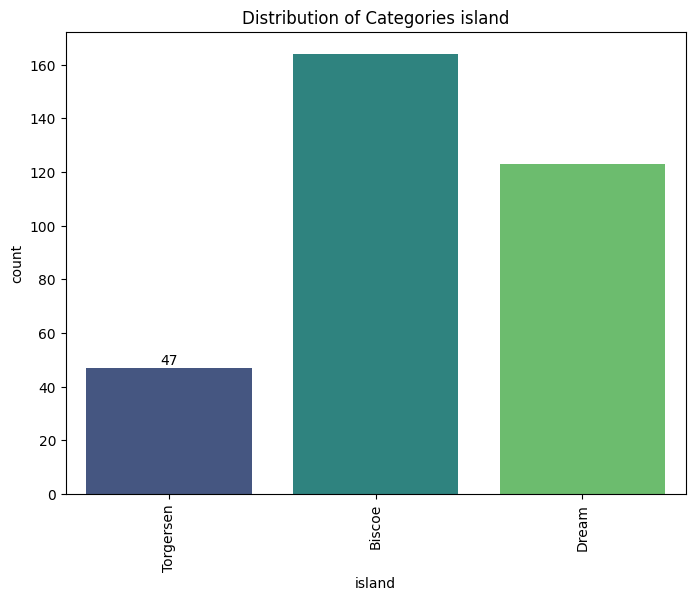

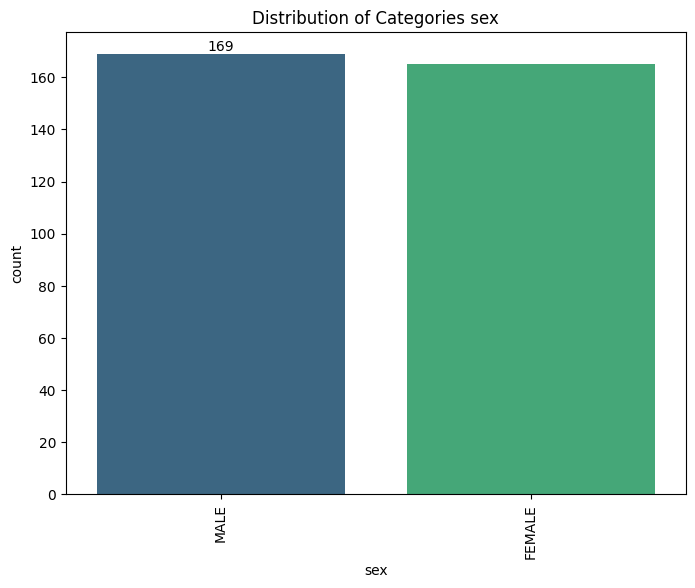

In [47]:
# Kategorik feature ların dağılımını göstermek için;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

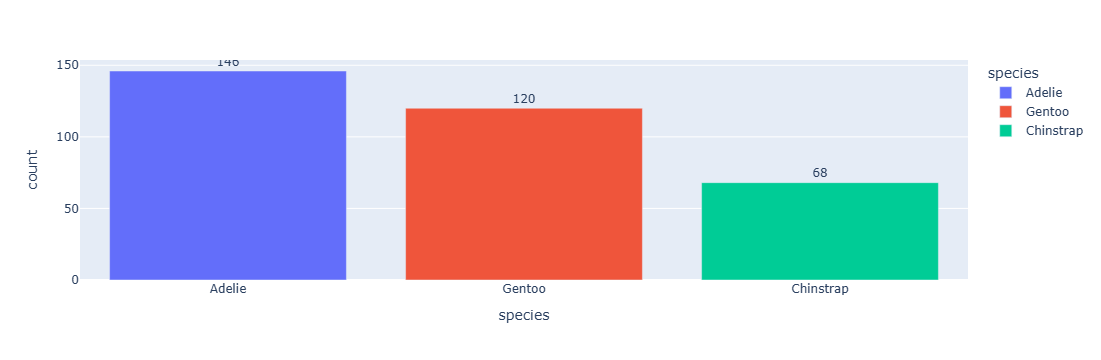

In [49]:
species_count = df['species'].value_counts().reset_index()
species_count.columns = ['species', 'count']

fig = px.bar(species_count, x='species', y='count', text='count', color='species')

fig.update_traces(texttemplate='%{text}', textposition='outside')

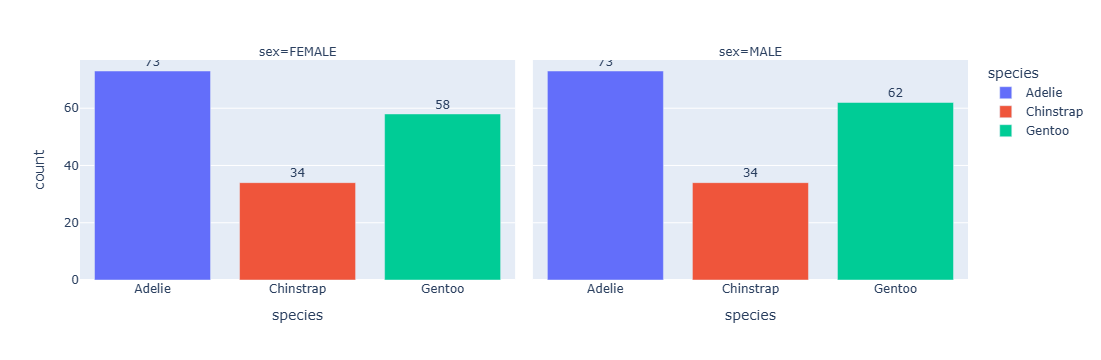

In [53]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='species', facet_col='sex', text='count')

fig.update_traces(texttemplate='%{text}', textposition='outside')

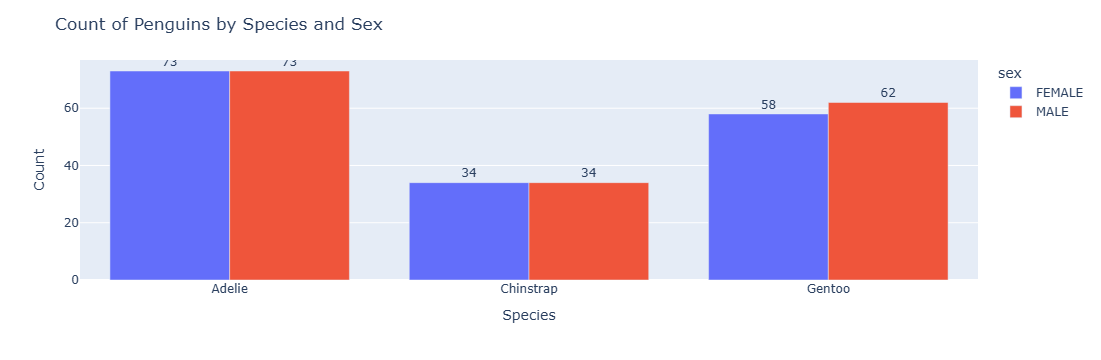

In [55]:
species_sex_count = df.groupby(['species', 'sex']).size().reset_index(name='count')

fig = px.bar(species_sex_count, x='species', y='count', color='sex', text='count', barmode='group')
fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    xaxis_title='Species',
    yaxis_title='Count',
    title='Count of Penguins by Species and Sex'
)

fig.show()

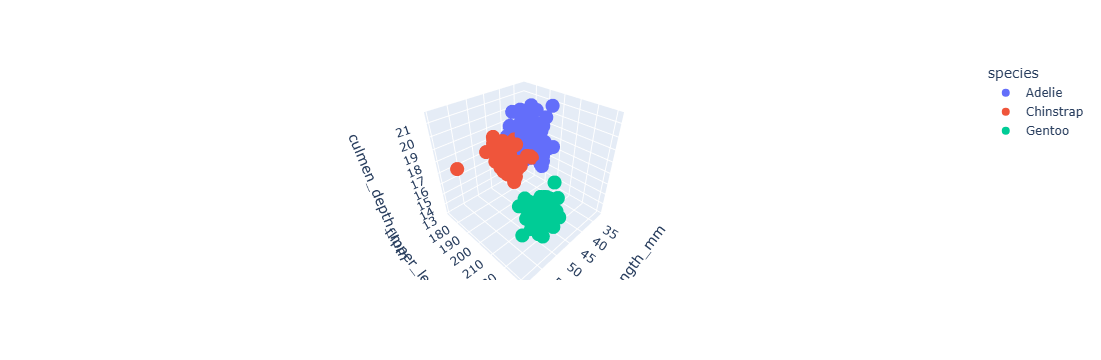

In [57]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

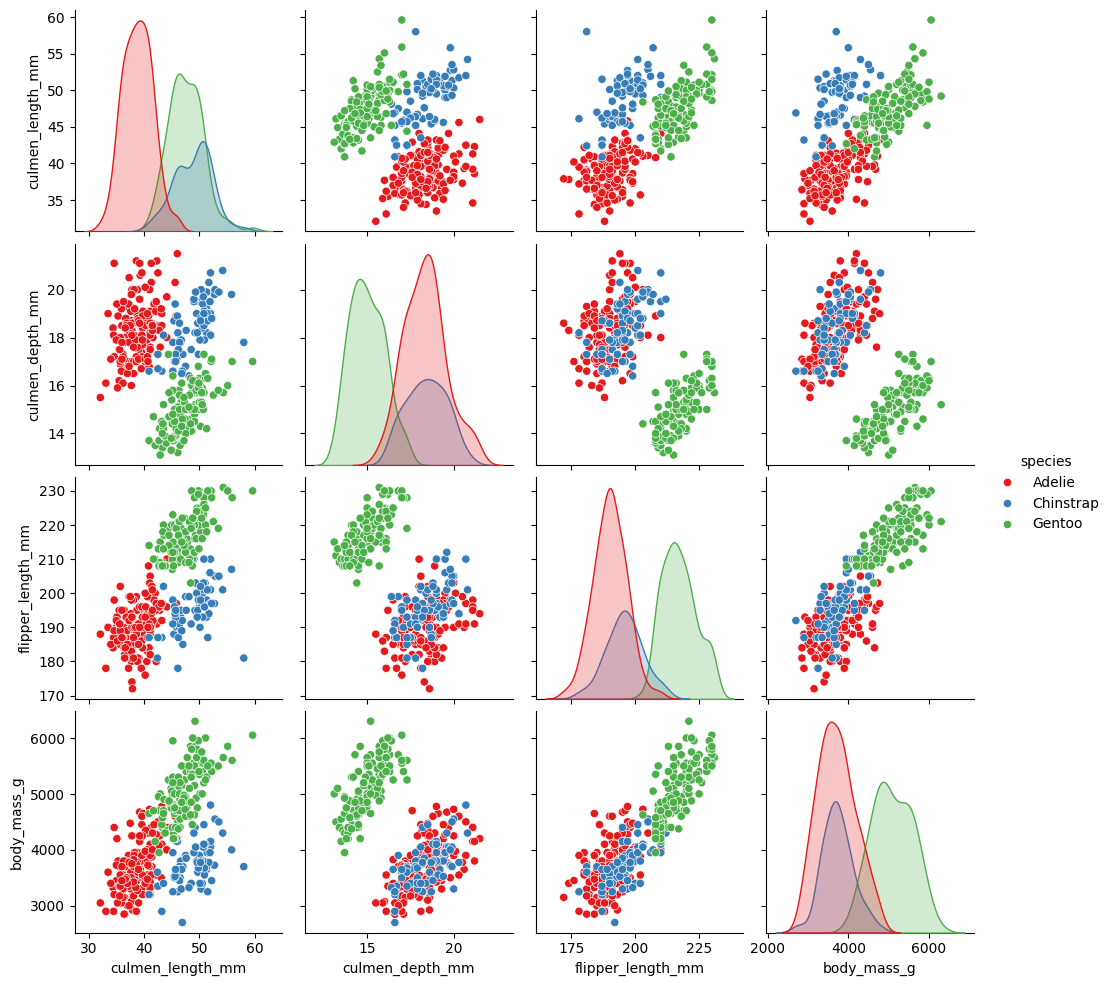

In [59]:
sns.pairplot(df, hue="species", palette="Set1");

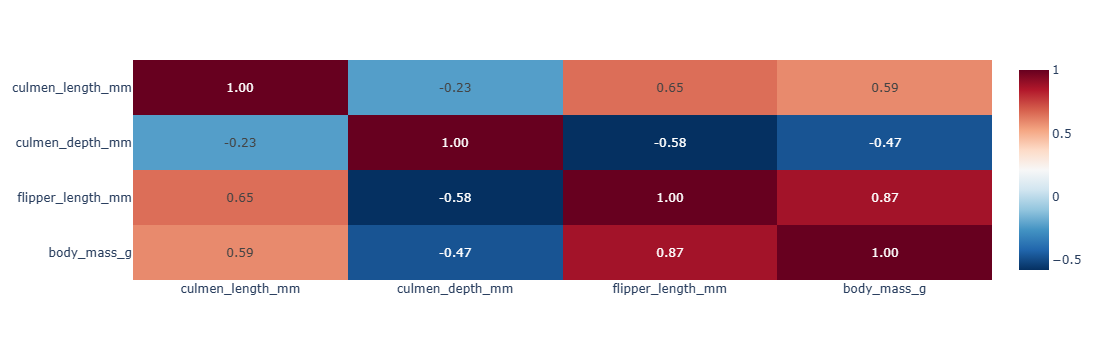

In [61]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

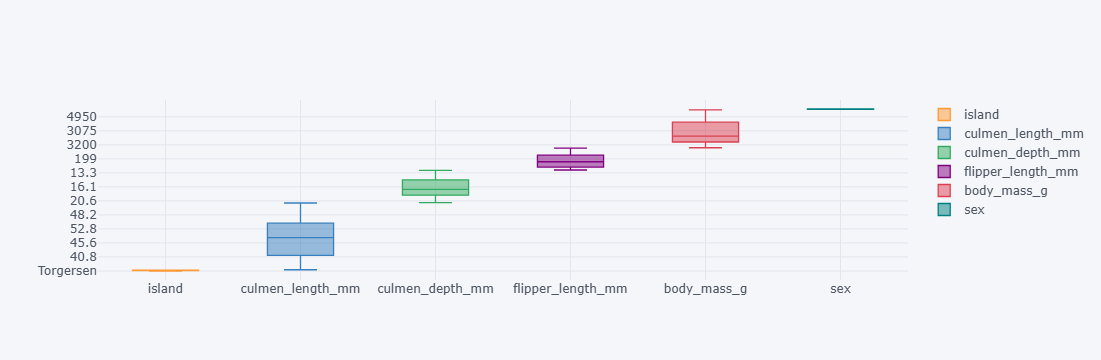

In [63]:
cf.go_offline()
df.iloc[:,1:].iplot(kind="box")

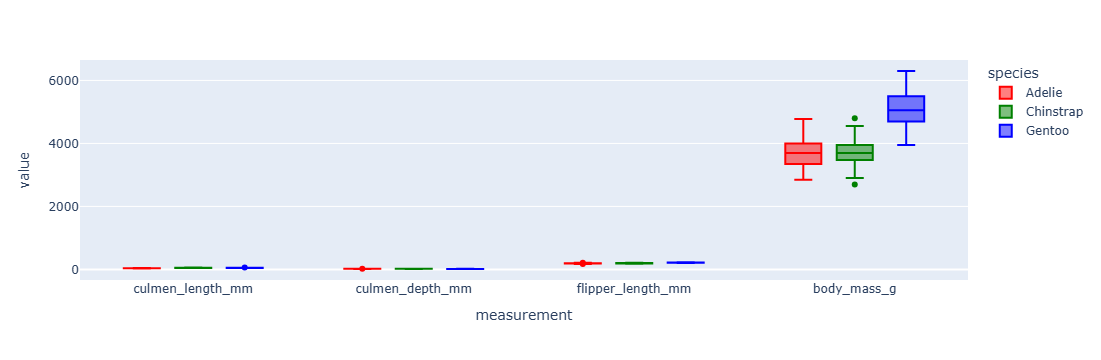

In [65]:
df_long = df.melt(id_vars=['species'],
                  value_vars=num_features,
                  var_name='measurement')

color_discrete_map = {
    "Adelie": 'red',
    "Chinstrap": 'green',
    "Gentoo": 'blue'
}

fig = px.box(df_long,
             x='measurement',
             y='value',
             color='species',
             color_discrete_map=color_discrete_map)

fig.show()

**melt function** is a function used to convert DataFrames to "long" format.


| species | length | width | height |
|---------|--------|-------|--------|
| Adelie  | 10     | 5     | 20     |
| Chinstrap | 12   | 6     | 22     |

```python
df.melt(id_vars=['species'], value_vars=['length', 'width', 'height'], var_name='measurement')
```

| species   | measurement | value |
|-----------|-------------|-------|
| Adelie    | length      | 10    |
| Adelie    | width       | 5     |
| Adelie    | height      | 20    |
| Chinstrap | length      | 12    |
| Chinstrap | width       | 6     |
| Chinstrap | height      | 22    |


# <font color='orange'> <b>Modelling</b><font color='orange'>  

|  | Decision Tree | Random Forest |
|-------------------|---------------|---------------|
| **Definition** | A model that makes decisions based on a series of binary choices, resembling a tree structure. | A collection of decision trees whose results are aggregated to make a final decision. |
| **Overfitting** | Prone to overfitting, especially with complex or noisy data. | Less prone to overfitting as it combines the results of multiple trees. |
| **Accuracy** | Can be less accurate with datasets having high variance or complexity. | Typically more accurate due to the aggregation reducing errors from individual trees. |
| **Complexity** | Simple structure, easy to understand and visualize. | More complex due to multiple trees, which makes it harder to visualize and interpret. |
| **Interpretability** | High interpretability as each decision path can be traced. | Lower interpretability because of the ensemble nature, although individual trees can be examined. |
| **Computation** | Fast to train on smaller datasets, but can struggle with large data. | Requires more computational power and time to train because of many trees. |
| **Use Case** | Works well when a simple model suffices and when explainability is important. | Better suited for problems where accuracy is critical and the model can handle more complexity. |

|  | Bagging | Boosting |
|-------------------|---------|----------|
| **Definition** | An ensemble method that combines the results of multiple models (e.g., trees) built with resampled training data to improve stability and accuracy. | An ensemble method that builds a sequence of models in a way that each subsequent model aims to correct the errors of the previous ones. |
| **Overfitting** | Reduces the risk of overfitting by averaging out predictions. | Can be prone to overfitting if not carefully tuned, especially on noisy datasets. |
| **Accuracy** | Generally provides improved accuracy by reducing variance. | Often provides higher accuracy by combining weak learners into a strong learner. |
| **Complexity** | Parallelizable since each model is built independently. | Sequential and additive, as each model depends on the previous one, increasing complexity. |
| **Interpretability** | Individual models are interpretable, but the ensemble as a whole may not be. | The sequential nature can make the ensemble less interpretable, although the contribution of each model is clearer. |
| **Computation** | Computationally intensive due to the need to train multiple models, but can be parallelized. | Computationally intensive as models are built in sequence and each model's errors are reweighted. |
| **Use Case** | Effective in reducing variance in models that have high variance. | Effective in reducing bias in models that have high bias, and in problems where the focus is on boosting performance of weak learners. |

## <font color='orange'> <b>Train | Test Split</b><font color='orange'>  

In [76]:
df.species.value_counts()

# Unbalanced data

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

In [78]:
X = df.drop('species',axis=1)
y = df['species']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [82]:
cat = X_train.select_dtypes("object").columns
cat

Index(['island', 'sex'], dtype='object')

In [84]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 
column_trans = make_column_transformer((ord_enc, cat),
                                       remainder='passthrough')

In [86]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(random_state=101))])

**If we did not use Pipeline, we would set up the model as follows.**

```python
from sklearn.tree import DecisionTreeClassifier

RF_model = RandomForestClassifier(random_state=101)

RF_model.fit(X_train,y_train)
```

## <font color='skyblue'> <b>Model Performance</b><font color='black'>  

In [91]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

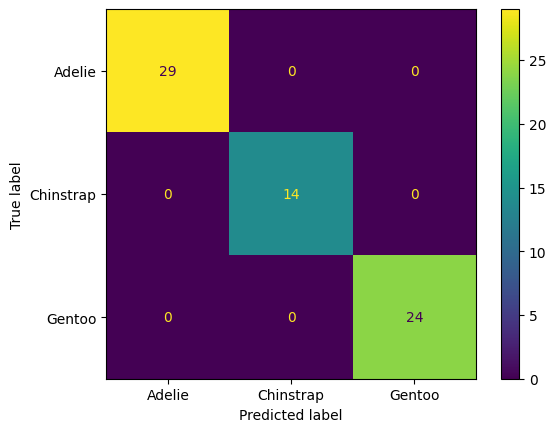

In [95]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [97]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



## <font color='orange'> <b>Cross Validation</b><font color='orange'>  

In [209]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10,
                        return_train_score=True
                       )
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.985185
train_accuracy           1.000000
test_precision_micro     0.985185
train_precision_micro    1.000000
test_recall_micro        0.985185
train_recall_micro       1.000000
test_f1_micro            0.985185
train_f1_micro           1.000000
dtype: float64

In [213]:
def plot_multiclass_roc_curve(model, X_test, y_test):
    """
    Multiclass ROC curve plotter.

    Parameters:
        model: Trained model with `predict_proba` method.
        X_test: Features for testing.
        y_test: True labels for testing.

    Returns:
        None: Displays the ROC curve plot.
    """

    # Binarize the target labels
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_binarized.shape[1]

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show()

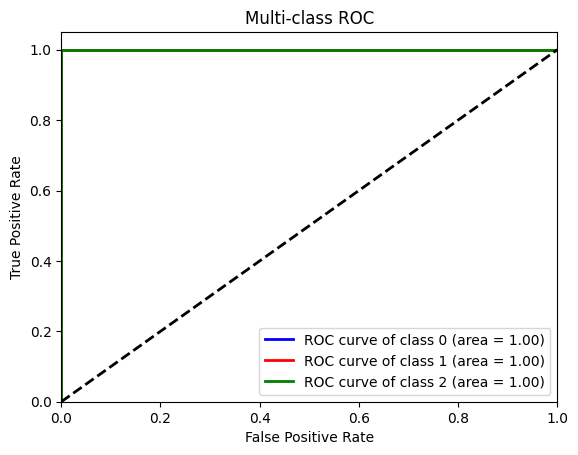

In [215]:
model.fit(X_train, y_train)

plot_multiclass_roc_curve(model, X_test, y_test)

In [219]:
def plot_multiclass_prc_curve(model, X_test, y_test):
    """
    Multi-class Precision-Recall Curve and Average Precision (AP) computation.

    Parameters:
    model : trained classifier with predict_proba method
        The model used for predictions.
    X_test : array-like
        Test features.
    y_test : array-like
        True labels for the test set.

    Returns:
    None
    """
    # Convert target to binary format
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_binarized.shape[1]

    # Get prediction probabilities
    y_pred_proba = model.predict_proba(X_test)

    # Calculate Precision-Recall and Average Precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

    # Plot Precision-Recall curves
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
    plt.figure()
    for i, color in zip(range(n_classes), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='PR curve of class {0} (AP = {1:0.2f})'.format(i, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Multi-class Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

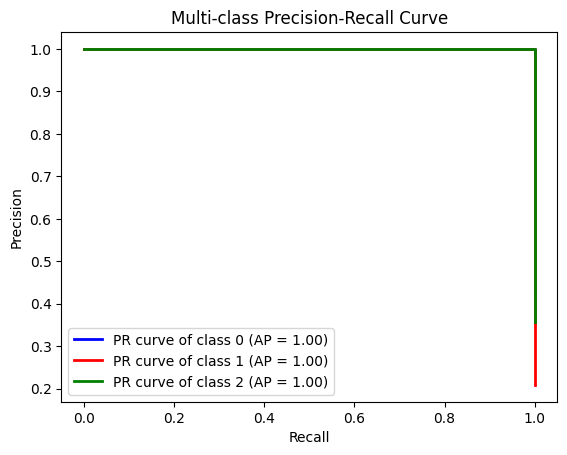

In [225]:
model.fit(X_train, y_train)

plot_multiclass_prc_curve(model, X_test, y_test)

## <font color='orange'> <b>Overfitting Risk and Features Importance in Random Forest</b><font color='orange'>  


Random Forest and Decision Tree models offer different approaches to determining Feature Importance.

Both models measure the impact of features on the target variable, but the Random Forest model employs a more comprehensive methodology.

**Decision Tree Feature Importance**

- **Single Model:** A Decision Tree operates on a single model, making it sensitive to noise or overfitting effects in the dataset.
- **Tree Depth:** The deeper the tree, the more complex the model becomes, which can exaggerate or underestimate the importance of features.
- **Local Best Feature:** The best feature is chosen at each split, potentially overlooking other influential features.

**Random Forest Feature Importance**

- **Multiple Models:** Random Forest combines the outcomes of multiple decision trees trained on random samples of the dataset.
- **Reduced Overfitting:** The independent training of each tree and the random feature selection reduce the risk of overfitting and enhance overall model stability.
- **Global Feature Importance:** Feature Importance scores are averaged across all trees, minimizing the bias of individual trees and providing more reliable measurements.
- **Feature Interactions:** Random Forest evaluates feature interactions and dependencies, offering a more comprehensive feature assessment.

**Example Application**

Suppose you are classifying penguin species using features such as "culmen_length" and "flipper_length."

- **Decision Tree:** A single decision tree might identify "flipper_length" as the best feature for the first split. This could lead to overemphasis on this feature and the potential neglect of other important features.

- **Random Forest:** A Random Forest model could comprise 100 different trees, each trained with different feature combinations. Consequently, features like "culmen_length" could also emerge as significant when their importance is averaged across multiple trees. This approach ensures that a feature deemed impactful across several trees is genuinely important for the model, providing a more reliable Feature Importance evaluation.

**In Summary:** The Feature Importance evaluation by a Random Forest model offers a more reliable and holistic perspective compared to a single decision tree. This reduces overfitting effects and helps us better understand the true impact of features on the model. Therefore, Random Forest is often the preferred method for Fature Importance analysis.


In [122]:
pipe_model["RF_model"].feature_importances_ # rf_model.feature_importances_

array([0.10360177, 0.00685424, 0.34896369, 0.17506071, 0.25094389,
       0.11457569])

In [124]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__island', 'ordinalencoder__sex',
       'remainder__culmen_length_mm', 'remainder__culmen_depth_mm',
       'remainder__flipper_length_mm', 'remainder__body_mass_g'],
      dtype=object)

In [126]:
X_train.sample()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
277,Biscoe,45.5,15.0,220.0,5000.0,MALE


In [128]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['island',
 'sex',
 'culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [130]:
df_fi = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

df_fi = df_fi.sort_values("Feature Importance", ascending = False)
df_fi

,Feature Importance
culmen_length_mm,0.348964
flipper_length_mm,0.250944
culmen_depth_mm,0.175061
body_mass_g,0.114576
island,0.103602
sex,0.006854


---

**Feature Importance in Decision Tree**

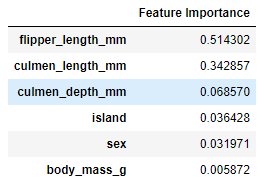

## <font color='orange'> <b>Understanding and Evaluating Hyperparameters in Random Forest</b><font color='orange'>  

**Differences Between RandomForestClassifier and DecisionTreeClassifier:**

1. **criterion Parameter**:  
   In Random Forest, in addition to the gini and entropy criteria available in Decision Tree, the **log_loss** function used in logistic regression is also introduced as an alternative. The default value is gini.

2. **max_features Parameter**:  
   The default value of `max_features` in Random Forest is **"sqrt"**. This means that the square root of all the features in the dataset will be selected, and this value will be rounded to the nearest integer.

3. **splitter Parameter**:  
   The **splitter** parameter does not exist in Random Forest. Decision trees branch by selecting the best feature at each split, meaning the selection is not random.

4. **bootstrap Parameter**:  
   The **bootstrap** parameter is an additional feature in Random Forest, with a default value of **True**. This means that approximately 66% (or 2/3) of the training dataset is randomly sampled for each tree, enhancing model diversity.

5. **oob_score Parameter**:  
   **Out-of-Bag (OOB)** scores allow the model to evaluate each tree's performance on the remaining 33% of the data not used for training. Setting this parameter to **True** enables you to observe the performance of each tree and the feature importance.

6. **class_weight Parameter**:  
   Random Forest has **"balanced"** and **"balanced_subsample"** options for the **class_weight** parameter. Decision Tree does not have the **"balanced_subsample"** option.  
   - **"balanced"**: Assigns weights based on the frequency of each class in the dataset.  
   - **"balanced_subsample"**: Assigns weights based on the class distribution in the training subset of each tree.

7. **max_samples Parameter**:  
   To reduce training costs for very large datasets, the **max_samples** parameter can be used. This parameter allows training using a selected proportion of the dataset (commonly **0.5** or **0.8**), thereby reducing computationtime and memory usage.


In [135]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter if

**n_estimators:**
- The number of decision trees used in Random Forest. Generally, a higher number of trees increases model stability, but after a certain point, performance improvements diminish, and computational time unnecessarily increases.
- **"How many trees should my model have?"** This is a crucial parameter for Random Forest. With subsampling, 2/3 of the data is used for training. Increasing this value often improves model performance, but beyond a point, the gains diminish, and computational cost rises.
- !! The creator of Random Forest (Leo Breiman) stated in his research that values of **64** and **128** should always be tested. More recent studies also report good results with values like **500** and **1000**.
- **default=100**

**bootstrap:**
- Specifies whether bootstrap sampling will be used for training each decision tree.
- If **bootstrap=True**, random sampling with replacement creates subsets for training each tree. This feature enhances the model's generalization capacity.
- This parameter is what makes the model a Random Forest. Each tree is trained on randomly selected samples with replacement. Due to replacement, a bootstrap sample may contain the same data multiple times.
- **Approximately 63% unique samples are used:** For each tree, a dataset equal in size to the training data (e.g., 1000 data points) is sampled. However, due to replacements, the unique samples account for about 63%. The remaining 37% is left as "out-of-bag" (OOB) data.
- **default=True:** Training is done on approximately 63% unique samples selected using the bootstrap method for each tree.
- If **bootstrap=False**, the entire dataset is used for training each tree, and no OOB data is generated.

**max_samples:**
- Defines the maximum number or proportion of bootstrap samples to be used for training each tree. This limits the size of random subsets used for training each tree.
- If **max_samples=None**, all data is used. If **max_samples=0.8**, 80% of the data is used, and Random Forest then selects 2/3 of this 80% for each tree. Thus, while allocating samples to each tree, 80% of the data is used.
- If specified as an integer (e.g., **max_samples=500**), 500 samples are randomly selected for each tree, and training is performed on this subset.
- **default=None**

**oob_score:**
- Specifies whether to evaluate the model using accuracy scores on out-of-bag samples.
- **default=False;** calculates a validation score on samples not used in training and serves as a form of cross-validation.
- Particularly useful for small datasets where we want to use the entire dataset for training. The OOB score eliminates the need for a separate test set while providing a balanced evaluation of model performance.

**max_features:**
- The maximum number of features considered for splitting at each node of a decision tree. This parameter increases the randomness of features used in training each tree, improving model diversity and generalization capability.
- Unlike DT, **default='sqrt'**; here, the maximum number of features per split is the square root of the total number of features, rounded to the nearest integer.

**criterion:**
- Determines the function used to measure the quality of a split. The selected criterion impacts how the dataset is divided and how decisions are made.
- In addition to **gini** and **entropy**, **log_loss** (used in logistic regression) is also included.
- **default=gini**

**min_samples_split:**
- The minimum number of samples required to split an internal node. Increasing this value helps prevent overfitting but may make it harder for the model to capture patterns in the dataset if set too high.
- **default=2;** any node with at least two samples can be split.

**min_samples_leaf:**
- The minimum number of samples required to be present in a leaf node. This parameter ensures decision trees are more general and less deep, helping to reduce overfitting.
- **default=1;** each leaf node must contain at least one sample.

**max_depth:**
- The maximum depth of the decision tree. This parameter controls the complexity of the model.
- **default=None;** splits continue until all leaf nodes are pure.

**max_leaf_nodes:**
- The maximum number of leaf nodes to be generated. This parameter limits tree growth and helps keep the model simpler.
- **default=None;** unlimited leaf nodes can be generated.

**class_weight:**

- **class_weight="balanced"**
  - **Usage:** Adjusts class weights based on class frequencies in the entire training dataset.
  - **Calculation:** Each class's weight is adjusted inversely proportional to its frequency, increasing the weights of less represented classes.
  - **Formula:** Weight for each class = (total samples) / (number of classes * number of samples in the class).
  - **Effect:** Class weights are consistent across trees since all data is considered when building each tree.

---

- **class_weight="balanced_subsample"**
  - **Usage:** Adjusts class weights based on the class frequencies within the bootstrap sample used for training each tree.
  - **Calculation:** During training, only the bootstrap sample for that tree is considered for weight adjustment.
  - **Formula:** Weight = (total bootstrap samples) / (number of classes * number of samples in the class within the bootstrap sample).
  - **Effect:** Class weights vary across trees since each tree is trained on a different bootstrap sample.


In [150]:
def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], feature_names=new_features, #features_names=X.columns
          class_names=df.species.unique().tolist(),
          filled = True,
          fontsize = 8);

In [152]:
RF_model = RandomForestClassifier(random_state=101, max_samples=0.5)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations) # pruned_tree = RandomForestClassifier(max_samples=0.5)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(max_samples=0.5, random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  96]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



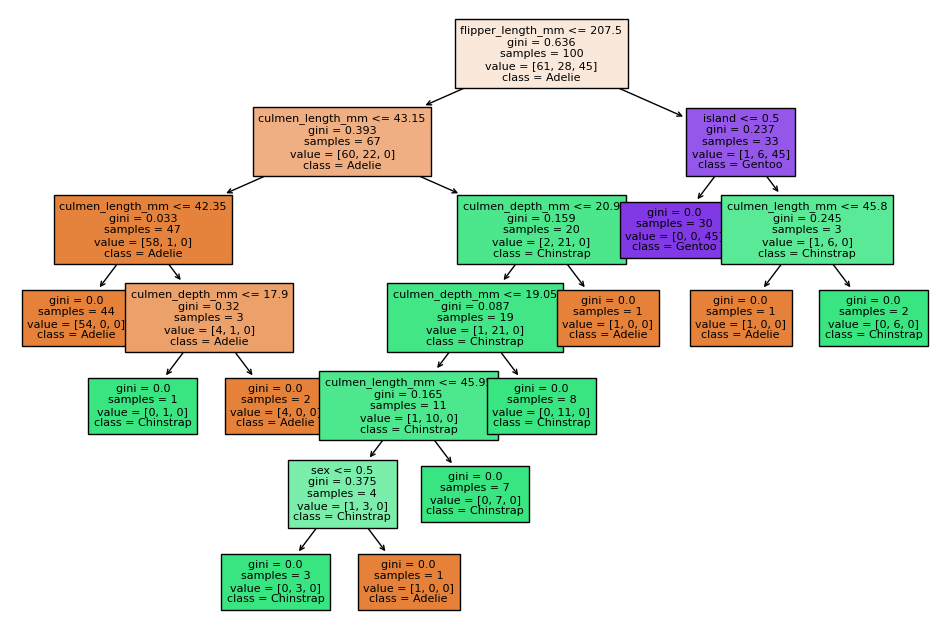

In [154]:
report_model(pruned_tree, 25)

# 133 * 2/3 = 89

# Approximately 2/3 of half of the 267 observations in the train data (for max_samples = 0.5 old.) are used in each tree.
# As you can see in this tree, an observation close to this ratio was used.

## <font color='orange'> <b>GridSearchCV</b><font color='orange'>  

In [187]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3, 4],
             'RF_model__min_samples_leaf': [2, 3, 4],
             'RF_model__max_samples':[0.8, 1]}

cv = StratifiedKFold(n_splits = 5)

In [189]:
RF_model = RandomForestClassifier(random_state=101)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

rf_vanilla = Pipeline(steps= operations)

rf_grid_model = GridSearchCV(rf_vanilla,
                             param_grid,
                             cv = cv,
                             scoring = "recall",
                             n_jobs = -1)

rf_grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['island', 'sex'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [64, 128, 200]},
             scoring='recall')

In [193]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 2,
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 2,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 64}

In [195]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(max_depth=2, max_features=2,
                                        max_samples=0.8, min_samples_leaf=2,
                                        n_estimators=64, random_state=101))])

In [191]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[113   4   0]
 [  5  49   0]
 [  0   0  96]]
              precision    recall  f1-score   support

      Adelie       0.96      0.97      0.96       117
   Chinstrap       0.92      0.91      0.92        54
      Gentoo       1.00      1.00      1.00        96

    accuracy                           0.97       267
   macro avg       0.96      0.96      0.96       267
weighted avg       0.97      0.97      0.97       267



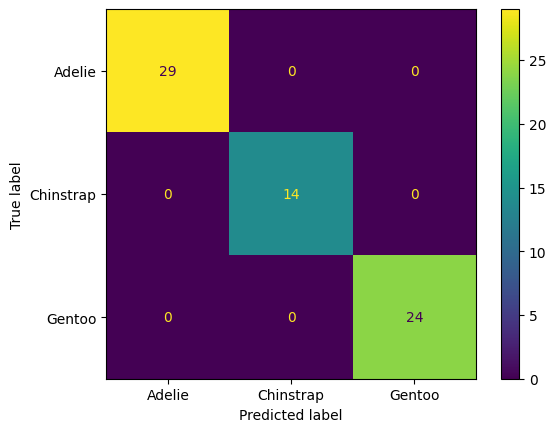

In [199]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test);

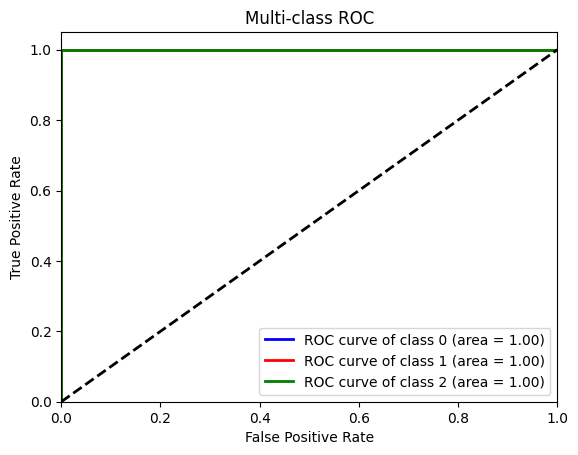

In [227]:
plot_multiclass_roc_curve(rf_grid_model, X_test, y_test)

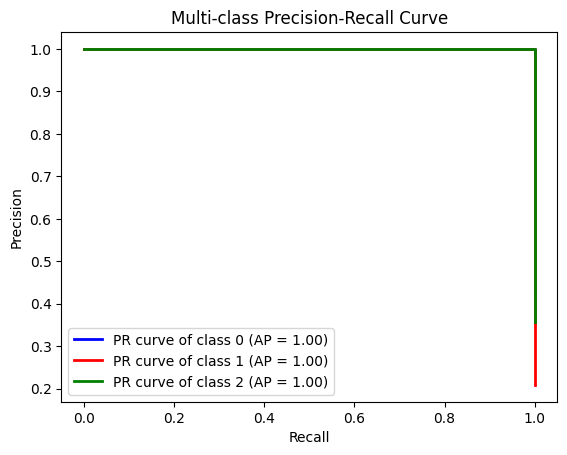

In [229]:
plot_multiclass_prc_curve(rf_grid_model, X_test, y_test)

## <font color='orange'> <b>Final Model & Prediction</b><font color='orange'>  

In [231]:
X = df.drop(columns=["species"])
y = df['species']

In [253]:
operations = [("transformer", column_trans), ("RF", RandomForestClassifier(max_depth=2, 
                                                                           max_features=2, 
                                                                           max_samples=0.8, 
                                                                           min_samples_leaf=2,
                                                                           n_estimators=64,
                                                                           random_state=101))]    # using grid model's best params
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))])),
                ('RF',
                 RandomForestClassifier(max_depth=2, max_features=2,
                                        max_samples=0.8, min_samples_leaf=2,
                                        n_estimators=64, random_state=101))])

In [255]:
my_dict = {"island": ["Torgersen", "Dream"], "culmen_length_mm":[35, 40], "culmen_depth_mm":[15, 20],
               "flipper_length_mm":[175, 210], "body_mass_g":[3000, 4600], "sex":["FEMALE", "MALE"]}

In [257]:
new_data = pd.DataFrame(my_dict)
new_data

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,35,15,175,3000,FEMALE
1,Dream,40,20,210,4600,MALE


In [259]:
pred = pipe_model.predict(new_data)
pred

array(['Adelie', 'Adelie'], dtype=object)

In [261]:
pred = pd.Series(pred).rename("prediction")

In [263]:
pd.concat([obs, pred], axis = 1)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,prediction
0,Torgersen,35,15,175,3000,FEMALE,Adelie
1,Dream,40,20,210,4600,MALE,Adelie


<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:10px 10px;"><b>THANK YOU!</b></p>